In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

Init Plugin
Init Graph Optimizer
Init Kernel


In [5]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

In [4]:
tokenizer = Tokenizer()

data = open('makulatura_lirics.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# print(tokenizer.word_indeх)
print(total_words)

2333


In [6]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [19]:
#track list
track_list = [
    'летучий голландец',
    'ножевое',
    'альцгеймер',
    'самый отстойный день',
    'этап',
    'вальтер',
    'нейт диаз',
    'лимб',
    'пляж'
]
for name in track_list:
    print(name, ':', end='')
    for word in name.split(): print(tokenizer.word_index[word], end=' ')
    print()



летучий голландец :536 537 
ножевое :306 
альцгеймер :345 
самый отстойный день :213 1116 71 
этап :1249 
вальтер :435 
нейт диаз :242 484 
лимб :1990 
пляж :249 


In [20]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-07-20 00:00:36.815088: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-20 00:00:36.815799: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
2022-07-20 00:00:37.899710: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-07-20 00:00:37.902296: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to ge

Epoch 1/100


2022-07-20 00:00:38.650870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-07-20 00:00:38.908798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-07-20 00:00:38.934613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-07-20 00:00:41.040188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-07-20 00:00:41.054486: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


136/136 [==============================] - 9s 32ms/step - loss: 7.4693 - accuracy: 0.0297
Epoch 2/100
136/136 [==============================] - 4s 28ms/step - loss: 6.6112 - accuracy: 0.0364
Epoch 3/100
136/136 [==============================] - 4s 27ms/step - loss: 5.9496 - accuracy: 0.0551
Epoch 4/100
136/136 [==============================] - 4s 27ms/step - loss: 4.9889 - accuracy: 0.1021
Epoch 5/100
136/136 [==============================] - 4s 27ms/step - loss: 3.8908 - accuracy: 0.2032
Epoch 6/100
136/136 [==============================] - 4s 28ms/step - loss: 3.1745 - accuracy: 0.3171
Epoch 7/100
136/136 [==============================] - 4s 28ms/step - loss: 2.8002 - accuracy: 0.3726
Epoch 8/100
136/136 [==============================] - 4s 28ms/step - loss: 2.3624 - accuracy: 0.4530
Epoch 9/100
136/136 [==============================] - 4s 28ms/step - loss: 2.4463 - accuracy: 0.4387
Epoch 10/100
136/136 [==============================] - 4s 30ms/step - loss: 2.1181 - accuracy

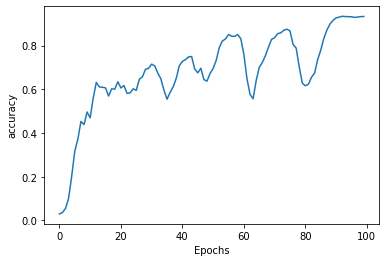

In [23]:
plot_graphs(history, 'accuracy')

In [27]:
seed_text = "В эфире стол заказов радио НейроАлёхин"
next_words = 50

  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

В эфире стол заказов радио НейроАлёхин разрушенном интервью зачем еще с тобой которой твои глаза по ты можешь выпить как ты можешь выпить как ты можешь как заглавный трек близко двери трек близко двери трек детского сном со поршнем утонуть в увлекательных семинаров монетка семинаров пролитый и тяжесть веселья вопрос рапиде за детских обедать связки потерянных
